# Activity - Customer Prediction Classification Model
1. Using ```customer-purchase-prediction-data.csv```, apply the relevant data preprocessing
steps.
2. Apply the **descriptive analysis** for the dataset.
3. Apply **diagnostic analysis** for the dataset.
4. Apply **predictive analysis** to predict the ```“subscribed term deposit”``` column values with splitting data to train and test datasets as **70% and 30%**, respectively.
5. Use **Decision Tree Algorithm**, **Random Forest Algorithm**, and **SVM Algorithm**.

**Note:** This model assumes post-contact prediction, therefore call duration is included.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/customer-purchase-prediction-data.csv')
df

,age,job,marital,education,Credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,pdays,previous,previous marketing campaign,subscribed term deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,October,79 seconds,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220 seconds,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,April,185 seconds,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,June,199 seconds,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226 seconds,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,July,329 seconds,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,May,153 seconds,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,August,151 seconds,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,February,129 seconds,4,211,3,other,no


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          4521 non-null   int64
 1   job                          4521 non-null   str  
 2   marital                      4521 non-null   str  
 3   education                    4521 non-null   str  
 4   Credit                       4521 non-null   str  
 5   balance                      4521 non-null   int64
 6   housing_loan                 4521 non-null   str  
 7   personal_loan                4521 non-null   str  
 8   contact                      4521 non-null   str  
 9   last_contact_day             4521 non-null   int64
 10  last_contact_month           4521 non-null   str  
 11  last_contact_duration/sec    4521 non-null   str  
 12  campaign                     4521 non-null   int64
 13  pdays                        4521 non-null   int64
 14  pre

In [4]:
df.duplicated().sum()

np.int64(0)

### EDA:
1. Target column - ```subscribed term deposit```
2. Missing values - 0
3. ```str``` columns - job, marital, education, Credit, housing_loan, personal_loan, contact, last_contact_month, last_contact_duration/sec, previous marketing campaign, subscribed term deposit
4. Duplicated rows - 0
5. The ```last_contact_duration/sec``` column has "seconds" in the column values.

### Pre-processing steps:
1. Rename columns ```Credit```, ```previous marketing campaign``` & ```subscribed term deposit```
2. Reorder ```pdays``` and ```previous``` columns (for ease of understanding)
3. Convert all values into lower.
4. Map target column values: ```yes → 1```, ```no → 0```
5. Separate unit from the values in ```last_contact_duration/sec``` and drop the unit column
6. Encode ```str``` columns appropriately. 

#### 1. Rename columns

In [5]:
df.columns = df.columns.str.lower() # Credit → credit
df.columns = df.columns.str.replace(' ', '_') # Replcae spaces in last two columns with '_'.

df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,pdays,previous,previous_marketing_campaign,subscribed_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,October,79 seconds,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220 seconds,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,April,185 seconds,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,June,199 seconds,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226 seconds,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,July,329 seconds,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,May,153 seconds,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,August,151 seconds,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,February,129 seconds,4,211,3,other,no


#### 2. Reorder ```pdays``` and ```previous``` columns

In [6]:
df = df[['age', 'job', 'marital', 'education', 'credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'last_contact_day', 'last_contact_month', 'last_contact_duration/sec', 'campaign', 'previous', 'pdays', 'previous_marketing_campaign', 'subscribed_term_deposit']]
df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,October,79 seconds,1,0,-1,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220 seconds,1,4,339,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,April,185 seconds,1,1,330,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,June,199 seconds,4,0,-1,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226 seconds,1,0,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,July,329 seconds,5,0,-1,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,May,153 seconds,1,0,-1,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,August,151 seconds,11,0,-1,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,February,129 seconds,4,3,211,other,no


#### 3. Turn all values into lower case

In [7]:
for column in df.columns:
    if df[column].dtype == 'str' or df[column].dtype == 'object':
        df[column] = df[column].str.lower()

df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,79 seconds,1,0,-1,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220 seconds,1,4,339,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,185 seconds,1,1,330,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,june,199 seconds,4,0,-1,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226 seconds,1,0,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,july,329 seconds,5,0,-1,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153 seconds,1,0,-1,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,august,151 seconds,11,0,-1,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,february,129 seconds,4,3,211,other,no


#### 4. Map target column values

In [8]:
df['subscribed_term_deposit'] = df['subscribed_term_deposit'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,79 seconds,1,0,-1,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220 seconds,1,4,339,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,185 seconds,1,1,330,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,june,199 seconds,4,0,-1,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226 seconds,1,0,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,july,329 seconds,5,0,-1,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153 seconds,1,0,-1,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,august,151 seconds,11,0,-1,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,february,129 seconds,4,3,211,other,0


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          4521 non-null   int64
 1   job                          4521 non-null   str  
 2   marital                      4521 non-null   str  
 3   education                    4521 non-null   str  
 4   credit                       4521 non-null   str  
 5   balance                      4521 non-null   int64
 6   housing_loan                 4521 non-null   str  
 7   personal_loan                4521 non-null   str  
 8   contact                      4521 non-null   str  
 9   last_contact_day             4521 non-null   int64
 10  last_contact_month           4521 non-null   str  
 11  last_contact_duration/sec    4521 non-null   str  
 12  campaign                     4521 non-null   int64
 13  previous                     4521 non-null   int64
 14  pda

#### 5. Separate unit from the values in ```last_contact_duration/sec``` and drop the unit column

In [10]:
df[['last_contact_duration_sec', 'seconds']] = df['last_contact_duration/sec'].str.split(expand = True) # Splitting
df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit,last_contact_duration_sec,seconds
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,79 seconds,1,0,-1,unknown,0,79,seconds
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220 seconds,1,4,339,failure,0,220,seconds
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,185 seconds,1,1,330,failure,0,185,seconds
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,june,199 seconds,4,0,-1,unknown,0,199,seconds
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226 seconds,1,0,-1,unknown,0,226,seconds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,july,329 seconds,5,0,-1,unknown,0,329,seconds
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153 seconds,1,0,-1,unknown,0,153,seconds
4518,57,technician,married,secondary,no,295,no,no,cellular,19,august,151 seconds,11,0,-1,unknown,0,151,seconds
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,february,129 seconds,4,3,211,other,0,129,seconds


In [11]:
df.drop(['last_contact_duration/sec', 'seconds'], axis = 1, inplace = True) # dropping unwanted columns
df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit,last_contact_duration_sec
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,1,0,-1,unknown,0,79
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,339,failure,0,220
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,1,1,330,failure,0,185
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,june,4,0,-1,unknown,0,199
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,-1,unknown,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,july,5,0,-1,unknown,0,329
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,0,-1,unknown,0,153
4518,57,technician,married,secondary,no,295,no,no,cellular,19,august,11,0,-1,unknown,0,151
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,february,4,3,211,other,0,129


In [12]:
df = df[['age', 'job', 'marital', 'education', 'credit', 'balance', 'housing_loan', 'personal_loan', 'contact', 'last_contact_day', 'last_contact_month', 'last_contact_duration_sec', 'campaign', 'previous', 'pdays', 'previous_marketing_campaign', 'subscribed_term_deposit']] # Reordering the columns
df

,age,job,marital,education,credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration_sec,campaign,previous,pdays,previous_marketing_campaign,subscribed_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,october,79,1,0,-1,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,4,339,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,april,185,1,1,330,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,june,199,4,0,-1,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,0,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,july,329,5,0,-1,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,-1,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,august,151,11,0,-1,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,february,129,4,3,211,other,0


In [13]:
df['last_contact_duration_sec'] = df['last_contact_duration_sec'].astype(int) # Changing last_contact_duration_sec data type
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          4521 non-null   int64
 1   job                          4521 non-null   str  
 2   marital                      4521 non-null   str  
 3   education                    4521 non-null   str  
 4   credit                       4521 non-null   str  
 5   balance                      4521 non-null   int64
 6   housing_loan                 4521 non-null   str  
 7   personal_loan                4521 non-null   str  
 8   contact                      4521 non-null   str  
 9   last_contact_day             4521 non-null   int64
 10  last_contact_month           4521 non-null   str  
 11  last_contact_duration_sec    4521 non-null   int64
 12  campaign                     4521 non-null   int64
 13  previous                     4521 non-null   int64
 14  pda

#### 6. Encode ```str``` columns 

In [14]:
# Check for unique values in each column

for column in df.columns:
    if df[column].dtype == 'str' or df[column].dtype == 'object':
        print(f'{df[column].name} - {df[column].unique()}\n')

job - <StringArray>
[   'unemployed',      'services',    'management',   'blue-collar',
 'self-employed',    'technician',  'entrepreneur',        'admin.',
       'student',     'housemaid',       'retired',       'unknown']
Length: 12, dtype: str

marital - <StringArray>
['married', 'single', 'divorced']
Length: 3, dtype: str

education - <StringArray>
['primary', 'secondary', 'tertiary', 'unknown']
Length: 4, dtype: str

credit - <StringArray>
['no', 'yes']
Length: 2, dtype: str

housing_loan - <StringArray>
['no', 'yes']
Length: 2, dtype: str

personal_loan - <StringArray>
['no', 'yes']
Length: 2, dtype: str

contact - <StringArray>
['cellular', 'unknown', 'telephone']
Length: 3, dtype: str

last_contact_month - <StringArray>
[  'october',       'may',     'april',      'june',  'february',    'august',
   'january',      'july',  'november', 'september',     'march',  'december']
Length: 12, dtype: str

previous_marketing_campaign - <StringArray>
['unknown', 'failure', 'other', '

In [15]:
df = pd.get_dummies(df, columns = ['job', 'marital','education', 'contact', 'last_contact_month', 'previous_marketing_campaign'], drop_first = True)
df

,age,credit,balance,housing_loan,personal_loan,last_contact_day,last_contact_duration_sec,campaign,previous,pdays,...,last_contact_month_july,last_contact_month_june,last_contact_month_march,last_contact_month_may,last_contact_month_november,last_contact_month_october,last_contact_month_september,previous_marketing_campaign_other,previous_marketing_campaign_success,previous_marketing_campaign_unknown
0,30,no,1787,no,no,19,79,1,0,-1,...,False,False,False,False,False,True,False,False,False,True
1,33,no,4789,yes,yes,11,220,1,4,339,...,False,False,False,True,False,False,False,False,False,False
2,35,no,1350,yes,no,16,185,1,1,330,...,False,False,False,False,False,False,False,False,False,False
3,30,no,1476,yes,yes,3,199,4,0,-1,...,False,True,False,False,False,False,False,False,False,True
4,59,no,0,yes,no,5,226,1,0,-1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,-333,yes,no,30,329,5,0,-1,...,True,False,False,False,False,False,False,False,False,True
4517,57,yes,-3313,yes,yes,9,153,1,0,-1,...,False,False,False,True,False,False,False,False,False,True
4518,57,no,295,no,no,19,151,11,0,-1,...,False,False,False,False,False,False,False,False,False,True
4519,28,no,1137,no,no,6,129,4,3,211,...,False,False,False,False,False,False,False,True,False,False


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  4521 non-null   int64
 1   credit                               4521 non-null   str  
 2   balance                              4521 non-null   int64
 3   housing_loan                         4521 non-null   str  
 4   personal_loan                        4521 non-null   str  
 5   last_contact_day                     4521 non-null   int64
 6   last_contact_duration_sec            4521 non-null   int64
 7   campaign                             4521 non-null   int64
 8   previous                             4521 non-null   int64
 9   pdays                                4521 non-null   int64
 10  subscribed_term_deposit              4521 non-null   int64
 11  job_blue-collar                      4521 non-null   bool 
 12  job

In [17]:
# Map yes/ no values to 1 and 0

value_map_columns = ['credit', 'housing_loan', 'personal_loan'] 

for column in value_map_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})

df

,age,credit,balance,housing_loan,personal_loan,last_contact_day,last_contact_duration_sec,campaign,previous,pdays,...,last_contact_month_july,last_contact_month_june,last_contact_month_march,last_contact_month_may,last_contact_month_november,last_contact_month_october,last_contact_month_september,previous_marketing_campaign_other,previous_marketing_campaign_success,previous_marketing_campaign_unknown
0,30,0,1787,0,0,19,79,1,0,-1,...,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,4,339,...,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,1,330,...,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,0,-1,...,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,0,-1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,0,-1,...,True,False,False,False,False,False,False,False,False,True
4517,57,1,-3313,1,1,9,153,1,0,-1,...,False,False,False,True,False,False,False,False,False,True
4518,57,0,295,0,0,19,151,11,0,-1,...,False,False,False,False,False,False,False,False,False,True
4519,28,0,1137,0,0,6,129,4,3,211,...,False,False,False,False,False,False,False,True,False,False


In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  4521 non-null   int64
 1   credit                               4521 non-null   int64
 2   balance                              4521 non-null   int64
 3   housing_loan                         4521 non-null   int64
 4   personal_loan                        4521 non-null   int64
 5   last_contact_day                     4521 non-null   int64
 6   last_contact_duration_sec            4521 non-null   int64
 7   campaign                             4521 non-null   int64
 8   previous                             4521 non-null   int64
 9   pdays                                4521 non-null   int64
 10  subscribed_term_deposit              4521 non-null   int64
 11  job_blue-collar                      4521 non-null   bool 
 12  job

In [19]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  4521 non-null   int64
 1   credit                               4521 non-null   int64
 2   balance                              4521 non-null   int64
 3   housing_loan                         4521 non-null   int64
 4   personal_loan                        4521 non-null   int64
 5   last_contact_day                     4521 non-null   int64
 6   last_contact_duration_sec            4521 non-null   int64
 7   campaign                             4521 non-null   int64
 8   previous                             4521 non-null   int64
 9   pdays                                4521 non-null   int64
 10  subscribed_term_deposit              4521 non-null   int64
 11  job_blue-collar                      4521 non-null   int64
 12  job

In [20]:
df.describe()

,age,credit,balance,housing_loan,personal_loan,last_contact_day,last_contact_duration_sec,campaign,previous,pdays,...,last_contact_month_july,last_contact_month_june,last_contact_month_march,last_contact_month_may,last_contact_month_november,last_contact_month_october,last_contact_month_september,previous_marketing_campaign_other,previous_marketing_campaign_success,previous_marketing_campaign_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,0.542579,39.766645,...,0.156160,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.043574,0.028534,0.819509
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,1.693562,100.121124,...,0.363047,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.204169,0.166510,0.384638
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,25.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Descriptive Analysis

In [21]:
correlation_matrix = abs(df.corr())
correlation_matrix

,age,credit,balance,housing_loan,personal_loan,last_contact_day,last_contact_duration_sec,campaign,previous,pdays,...,last_contact_month_july,last_contact_month_june,last_contact_month_march,last_contact_month_may,last_contact_month_november,last_contact_month_october,last_contact_month_september,previous_marketing_campaign_other,previous_marketing_campaign_success,previous_marketing_campaign_unknown
age,1.000000,0.017885,0.083820,0.193888,0.011250,0.017853,0.002367,0.005148,0.003511,0.008894,...,0.009329,0.034671,0.057909,0.119784,0.027659,0.081766,0.015074,0.026179,0.048626,0.017414
credit,0.017885,1.000000,0.070886,0.006881,0.063994,0.013261,0.011615,0.012348,0.026656,0.026317,...,0.038542,0.004950,0.013687,0.005580,0.008962,0.017550,0.014105,0.005801,0.022410,0.038997
balance,0.083820,0.070886,1.000000,0.050227,0.071349,0.008677,0.015950,0.009976,0.026196,0.009437,...,0.090516,0.056023,0.021805,0.070809,0.120363,0.058694,0.005975,0.000129,0.029999,0.033843
housing_loan,0.193888,0.006881,0.050227,1.000000,0.018451,0.031291,0.015740,0.003574,0.038621,0.116893,...,0.067143,0.085332,0.072133,0.412996,0.006073,0.102506,0.060410,0.046986,0.088504,0.062805
personal_loan,0.011250,0.063994,0.071349,0.018451,1.000000,0.004879,0.004997,0.017120,0.022115,0.031086,...,0.172880,0.036580,0.038525,0.032816,0.023113,0.024372,0.028523,0.018397,0.050643,0.041107
last_contact_day,0.017853,0.013261,0.008677,0.031291,0.004879,1.000000,0.024629,0.160706,0.059114,0.094352,...,0.125002,0.217517,0.024570,0.028992,0.095832,0.040235,0.043666,0.021062,0.027720,0.075100
last_contact_duration_sec,0.002367,0.011615,0.015950,0.015740,0.004997,0.024629,1.000000,0.068382,0.018080,0.010380,...,0.011994,0.016196,0.026212,0.008639,0.009572,0.004566,0.020023,0.008109,0.049255,0.015239
campaign,0.005148,0.012348,0.009976,0.003574,0.017120,0.160706,0.068382,1.000000,0.067833,0.093137,...,0.124571,0.044317,0.004045,0.076263,0.083385,0.058536,0.040207,0.030435,0.058268,0.117375
previous,0.003511,0.026656,0.026196,0.038621,0.022115,0.059114,0.018080,0.067833,1.000000,0.577562,...,0.114808,0.084432,0.019445,0.027549,0.055400,0.088764,0.059763,0.358382,0.250277,0.682746
pdays,0.008894,0.026317,0.009437,0.116893,0.031086,0.094352,0.010380,0.093137,0.577562,1.000000,...,0.138654,0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.382970,0.212188,0.867713


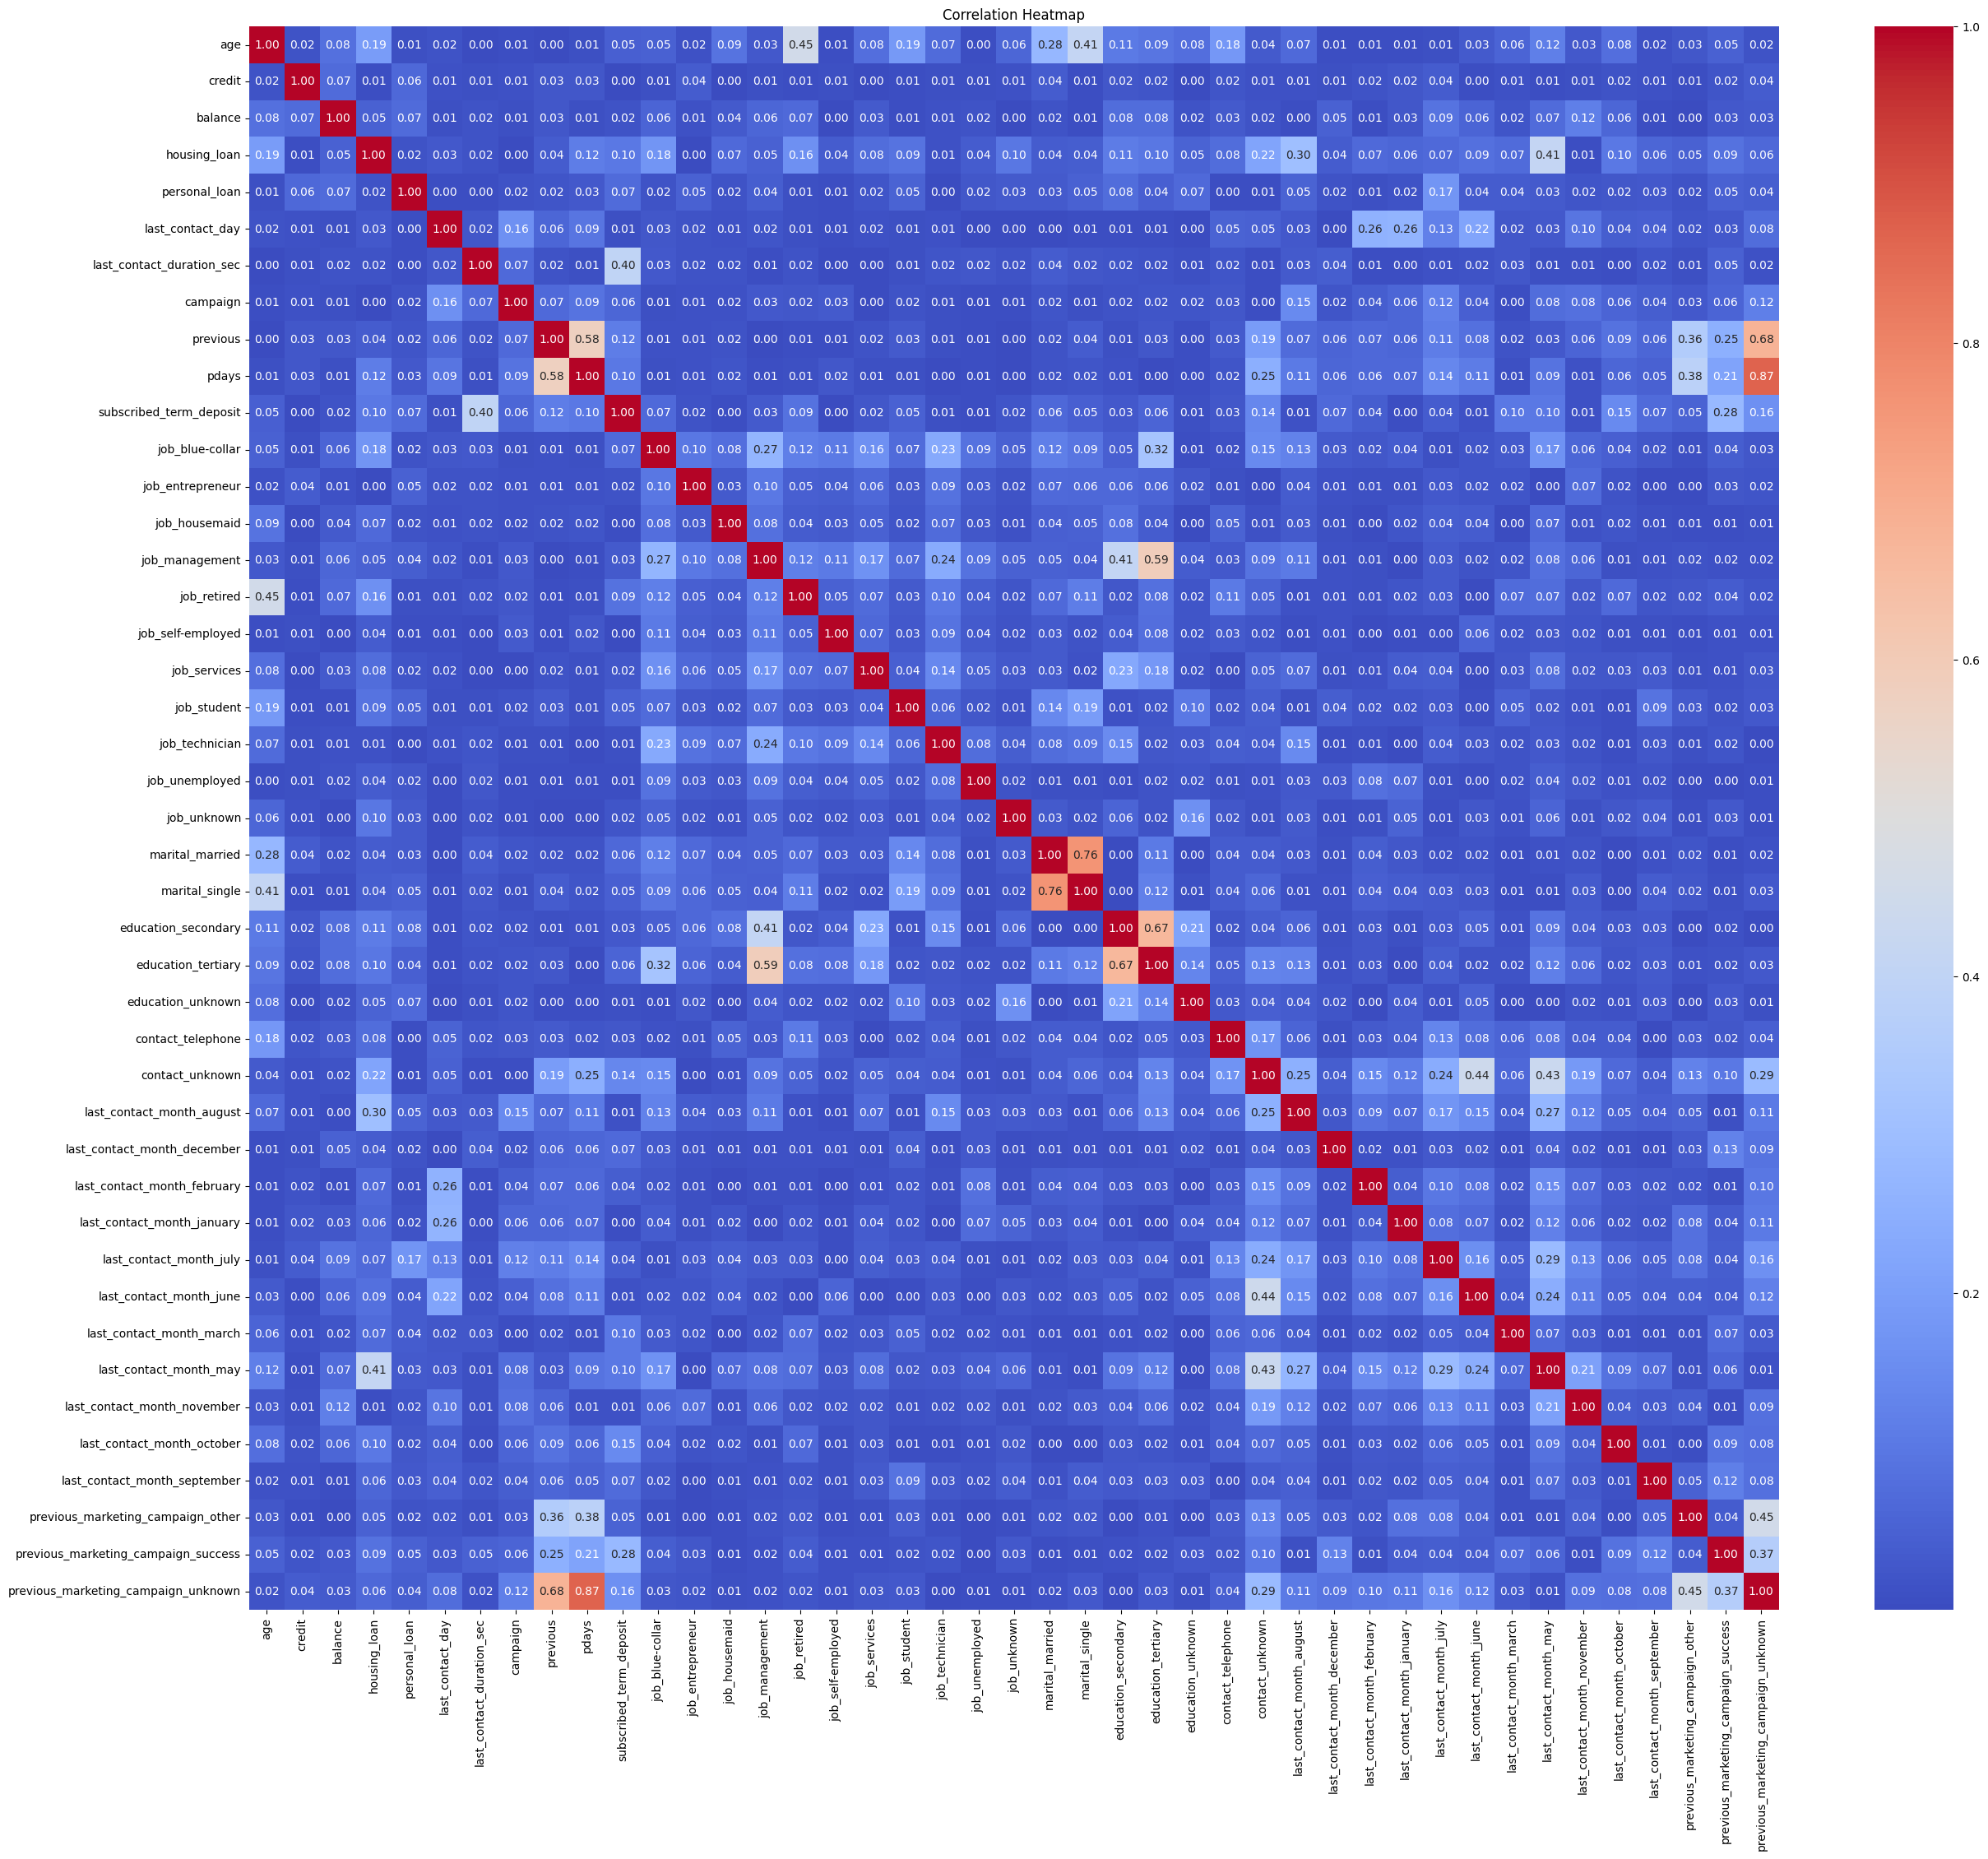

In [22]:
# Visualize the correlation matrix using a heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (30, 25))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation thresholding is often taught incorrectly as a universal feature selection rule.

It is mainly relevant for:
- Linear regression
- When interpretability matters
- When coefficients become unstable

But for:
- Decision Trees
- Random Forest
- Kernel SVM

It is not required.

### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['subscribed_term_deposit'], axis = 1)
y = df['subscribed_term_deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 42,
    stratify = y
)

X_train.shape, X_test.shape

((3164, 42), (1357, 42))

### Diagnostic Analysis

In [24]:
# Checking target column imbalance

y.value_counts()
y.value_counts(normalize=True)

subscribed_term_deposit
0    0.88476
1    0.11524
Name: proportion, dtype: float64

```bash
0 88.5%
1 11.5%
```
A **strong class imbalance**

#### SVM
SVM is distance-based. Therefore we must:
- Scale features
- Use ```class_weight="balanced"```
- Use a pipeline to prevent data leakage

In [25]:
# Build the SVM Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_model = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel = "rbf", # Linear kernel → straight line separation, RBF kernel → flexible curved boundary. Marketing data is rarely linearly separable. Therefore RBF kernel.
        C = 1.0,
        gamma = "scale",
        class_weight = "balanced", # This tells the algorithm “Misclassifying the minority class (1) is more costly”. It automatically adjusts weights inversely proportional to class frequency.
        random_state = 42
    ))
])

svm_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('svm', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'


In [26]:
# Evaluate on the test set

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = svm_model.predict(X_test)

print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

# ROC-AUC needs decision scores (or probabilities). SVC gives decision_function by default.
y_score = svm_model.decision_function(X_test)
print(f'ROC-AUC:\n{roc_auc_score(y_test, y_score)}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1201
           1       0.43      0.72      0.54       156

    accuracy                           0.86      1357
   macro avg       0.70      0.80      0.73      1357
weighted avg       0.90      0.86      0.87      1357


Confusion Matrix:
[[1054  147]
 [  44  112]]

ROC-AUC:
0.8873961869382352



**ROC = Receiver Operating Characteristic curve**

It evaluates how well your model separates:
- Class 1 (subscribed)
- Class 0 (not subscribed)

It is built using two quantities:
- TPR (True Positive Rate) → also called Recall
$$
\mathrm{TPR} = \frac{TP}{TP + FN}
$$

Interpretation:
> Out of all actual subscribers, how many did we correctly identify?

- FPR (False Positive Rate)
$$
\mathrm{FPR} = \frac{FP}{FP + TN}
$$

Interpretation:
> Out of all actual non-subscribers, how many did we wrongly predict as subscribers?

The ROC curve plots:
```bash
Y-axis → TPR (Recall)
X-axis → FPR
```
At different decision thresholds.

SVM internally produces a **decision score.** By default it is:
- Score > 0 → class 1
- Score < 0 → class 0
  
But we can shift that threshold:
- Lowered threshold → More TPs | Higher Recall/TPR | More FPs
- Increased threshold → Less TPs | Lower Recall/TPR | Less FPs
Therefore, ROC shows model performance across ALL possible thresholds.

---

**AUC = Area Under the Curve**

Range:
- 0.5 → random guessing
- 0.7 → acceptable
- 0.8 → good
- 0.9+ → excellent
- 1.0 → perfect

Interpretation:
> Probability that the model ranks a random subscriber higher than a random non-subscriber.

---

As for ROC-AUC, you got: 88.7% 

That means:
> There is an 88.7% chance that the model assigns a higher score to a randomly chosen subscriber than to a randomly chosen non-subscriber.

A **very strong discrimination power** (In the world of machine learning, Discrimination is the **ability of the model to tell the difference between two groups**. 0.5 means it's a coin flip and model doesn't know to rank them correctly. 1.0 model perfectly rank them in the correct order).

Overall ROC-AUC tells you that the model has learnt the patterns even though it predict the incorrect result (because, if the model has learnt patterns correctly, this means the results are inaccurate only because of the threshold and other factors that does not affect the ROC-AUC). <br>
For example:
- If the model assigns a distance of ```+10.5``` to a ```Class A``` sample and ```+0.2``` to a ```Class B``` sample, it demonstrates it has **identified features that distinguish the two**. Even if you haven't picked a final threshold yet, the **relative order** tells you the model is capturing the underlying logic of the data.

In [27]:
# Threshold tuning

new_threshold = 0.5

y_pred_adjusted = (y_score > new_threshold).astype(int) # If y_score is greater than new_threshold → 1, else → 0

print(f'Classification Report:\n{classification_report(y_test, y_pred_adjusted)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_adjusted)}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1201
           1       0.49      0.45      0.47       156

    accuracy                           0.88      1357
   macro avg       0.71      0.69      0.70      1357
weighted avg       0.88      0.88      0.88      1357


Confusion Matrix:
[[1127   74]
 [  86   70]]



In [31]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.linspace(y_score.min(), y_score.max(), 200)

best_t = None
best_f1 = -1
best_p = None
best_r = None

for t in thresholds:
    y_pred_t = (y_score > t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_t = t
        best_f1 = f1
        best_p = precision_score(y_test, y_pred_t)
        best_r = recall_score(y_test, y_pred_t)

best_t, best_f1, best_p, best_r

(np.float64(0.10987665516835099),
 0.5558441558441558,
 0.4672489082969432,
 0.6858974358974359)